# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [20]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn. cluster import KMeans
from itertools import combinations
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
   
    
    m, _ = Data_points.shape
    K, n_features = Cluster_Centroids.shape
    
    if Distance_Type == "euclidean":
        distances = np.sqrt(np.sum((Data_points[:, np.newaxis] - Cluster_Centroids) ** 2, axis=2))
    elif Distance_Type == "pearson":
        mean_data = np.mean(Data_points, axis=1, keepdims=True)
        mean_centroids = np.mean(Cluster_Centroids, axis=1, keepdims=True)
        centered_data = Data_points - mean_data
        centered_centroids = Cluster_Centroids - mean_centroids
        data_norm = np.linalg.norm(centered_data, axis=1, keepdims=True)
        centroid_norm = np.linalg.norm(centered_centroids, axis=1, keepdims=True)
        corr = np.dot(centered_data, centered_centroids.T) / (data_norm * centroid_norm.T)
        distances = 1 - corr
    else:
        raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'.")

    return distances

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iter=100, tol=1e-4):
    
    # Initialize cluster centroids
    np.random.seed(0)
    n_samples, n_features = Data_points.shape
    cluster_centroids = np.random.rand(Number_of_Clusters, n_features)
    
    # Initialize cluster assignments
    cluster_assignments = np.zeros(n_samples)
    
    # Initialize distortion function
    distortion = float('inf')
    prev_distortion = float('inf')
    
    # Loop until maximum iterations reached
    for _ in range(max_iter):
        distances = GUC_Distance(cluster_centroids, Data_points, Distance_Type)
        cluster_assignments = np.argmin(distances, axis=1)
        mean_square_distances = np.array([np.mean(np.sum((Data_points[cluster_assignments == i] - cluster_centroids[i])**2, axis=1)) for i in range(Number_of_Clusters)])
        distortion = np.sum(mean_square_distances)
        if np.abs(prev_distortion - distortion) < tol:
            break
        prev_distortion = distortion
        
        for i in range(Number_of_Clusters):
            cluster_centroids[i] = np.mean(Data_points[cluster_assignments == i], axis=0)
    
    return mean_square_distances, distortion  


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [9]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [5]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

<class 'numpy.ndarray'>
(20, 2)


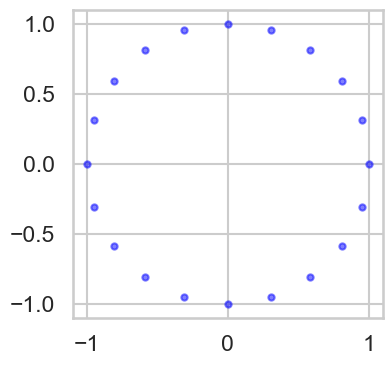

In [6]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
data = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams['figure.figsize'] = [4,4]
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
print(type(X))
print(np.array(X).shape)
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

<class 'numpy.ndarray'>
(1000, 2)


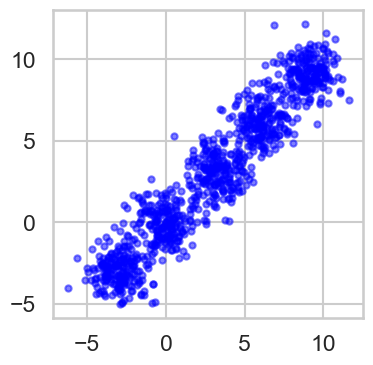

In [7]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
print(type(X))
print(np.array(X).shape)

#### 2.3. Example 3 : moons Data Gen and display 

<class 'numpy.ndarray'>
(1000, 2)


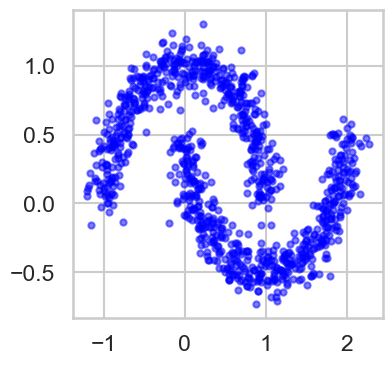

In [8]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)
print(type(X))
print(np.array(X).shape)

In [9]:
def calculate_cluster_metrics(true_labels, predicted_labels, data):
    """
    Calculate cluster performance metrics.

    Parameters:
    - true_labels: True labels of the data points.
    - predicted_labels: Predicted labels assigned by the clustering algorithm.
    - data: The data matrix used for clustering.

    Returns:
    - silhouette: Silhouette Score.
    - calinski_harabasz: Calinski-Harabasz Index.
    - davies_bouldin: Davies-Bouldin Index.
    """
    silhouette = silhouette_score(data, predicted_labels)
    calinski_harabasz = calinski_harabasz_score(data, predicted_labels)
    davies_bouldin = davies_bouldin_score(data, predicted_labels)

    return silhouette, calinski_harabasz, davies_bouldin

# Example usage:
# Replace true_labels, predicted_labels, and data with your actual data
true_labels = [0, 1, 0, 1, 0, 1]
predicted_labels = [1, 0, 1, 0, 1, 0]
data = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]]

silhouette, calinski_harabasz, davies_bouldin = calculate_cluster_metrics(true_labels, predicted_labels, data)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: -0.20370370370370383
Calinski-Harabasz Index: 0.375
Davies-Bouldin Index: 2.666666666666667


## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [15]:
def GUC_Kmean_plot(X):
    num_clusters_range = range(2, 8)
    distortion_values = []

    for num_clusters in num_clusters_range:
        _, distortion = GUC_Kmean(X, num_clusters, Distance_Type="euclidean")
        distortion_values.append(distortion)

    # Plot cluster performance metric vs number of clusters
    plt.plot(num_clusters_range, distortion_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Performance Metric')
    plt.show()

    # Plot clusters for each number of centroids
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
        plt.title(f'Number of Clusters: {num_clusters}')
        plt.subplot(1, 2, 2)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        plt.text(0.5, 0.5, f'Silhouette Score: {silhouette_avg}', ha='center', fontsize=12)
        plt.axis('off')
        plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


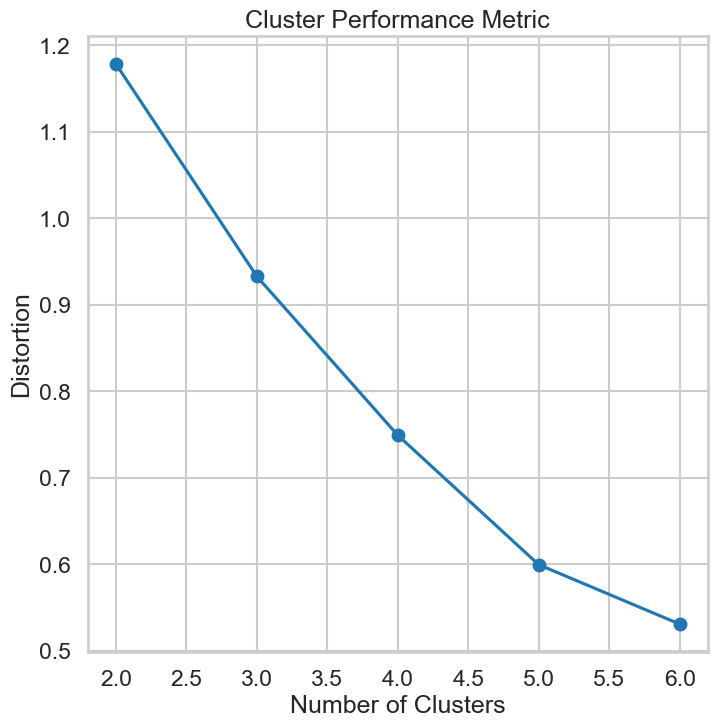

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


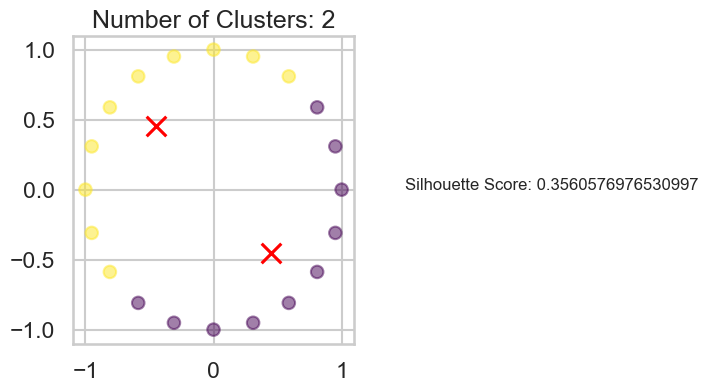

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


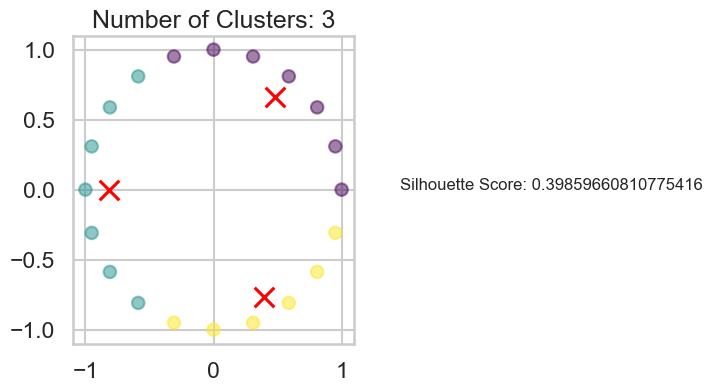

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


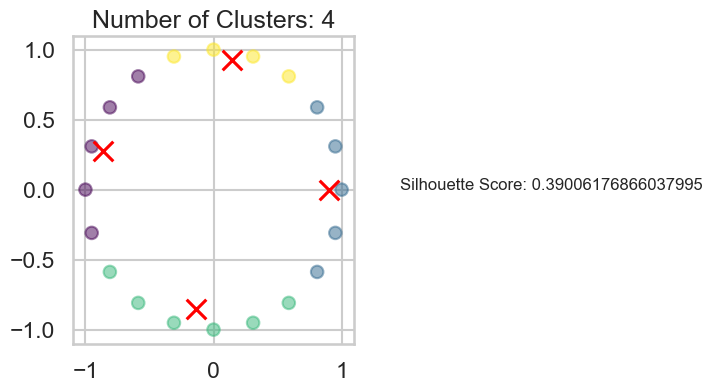

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


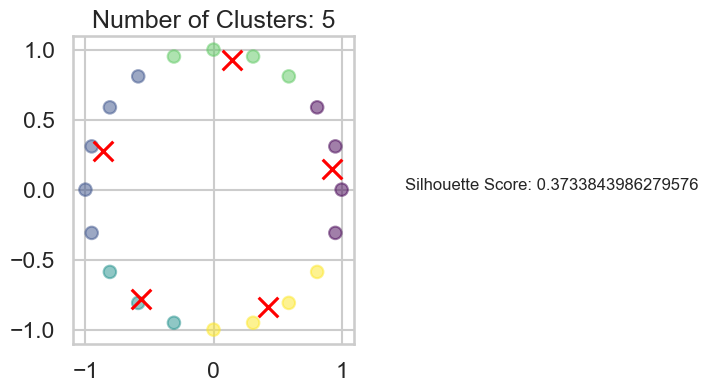

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


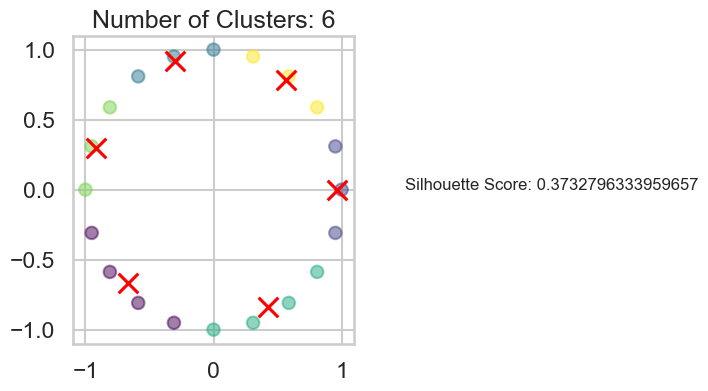

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


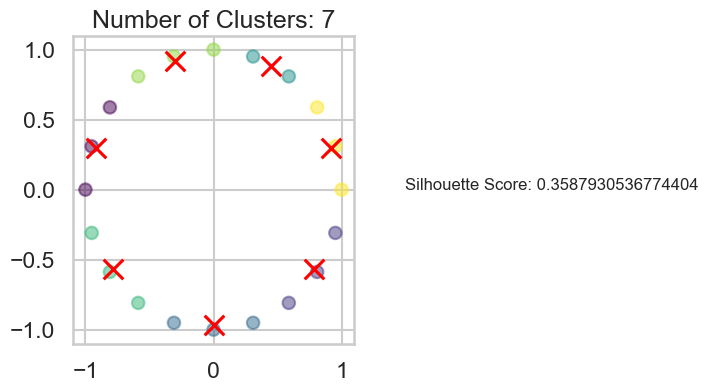

In [16]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
X_2D = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
GUC_Kmean_plot(X_2D)

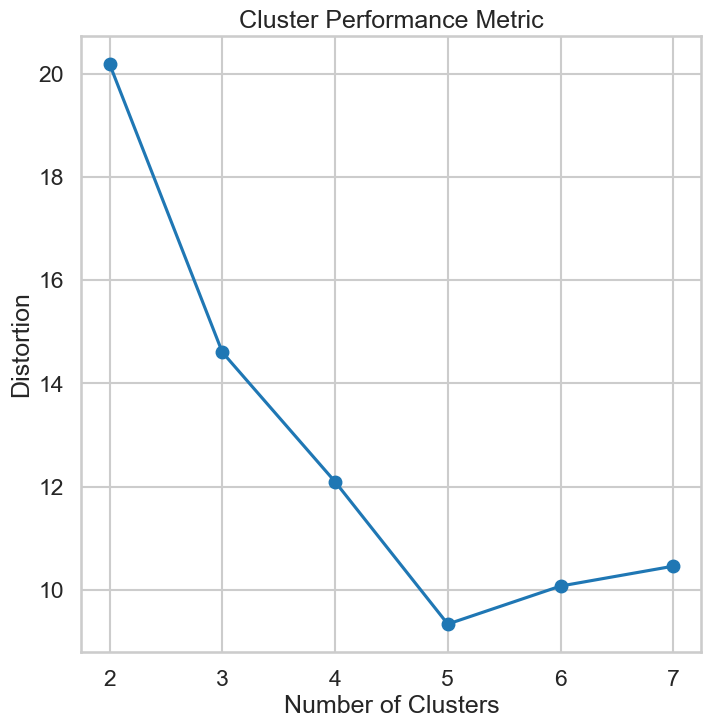

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


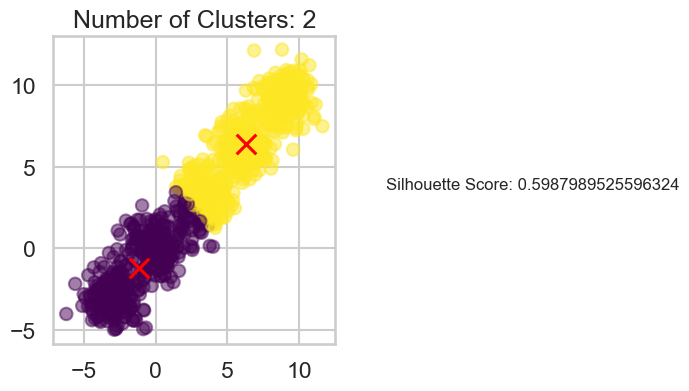

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


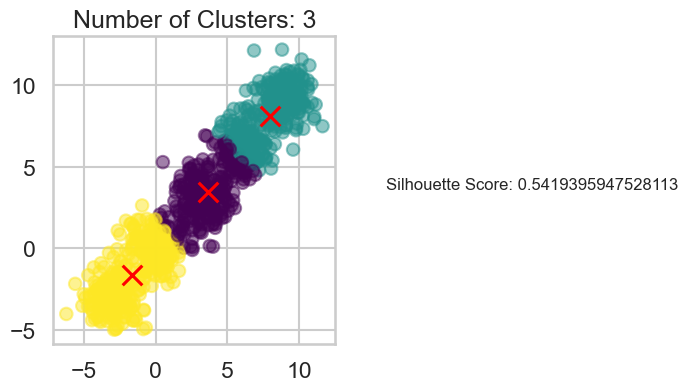

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


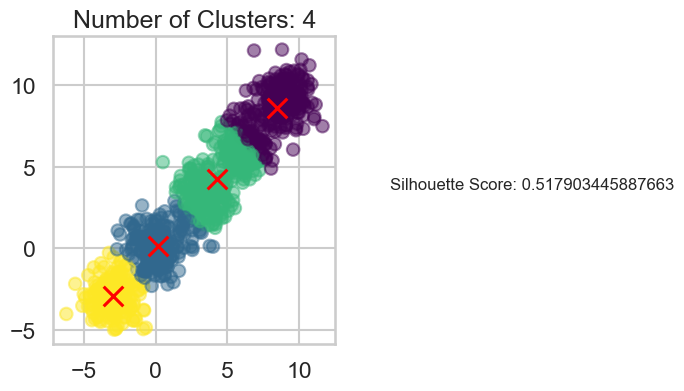

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


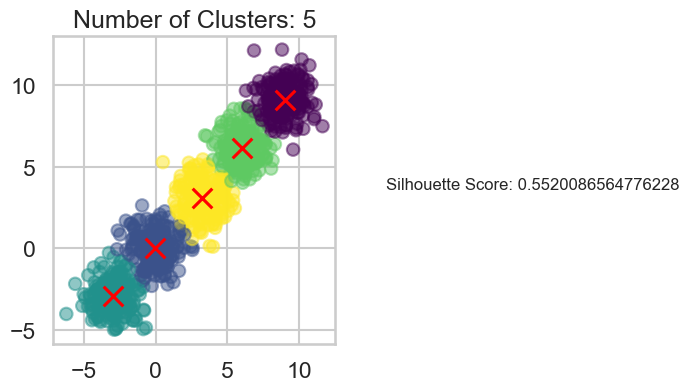

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


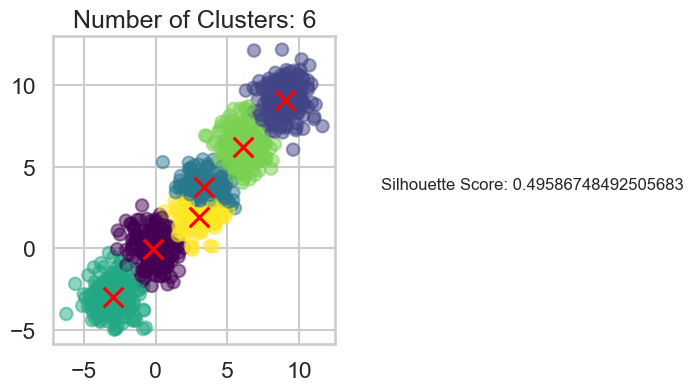

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


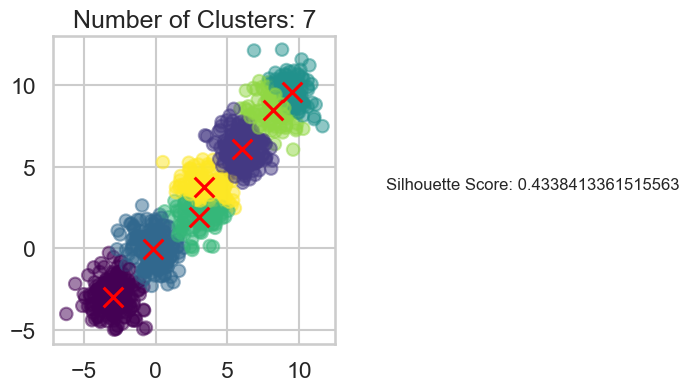

In [17]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
X_2D_1, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                           centers=centers, shuffle=False, random_state=42)
GUC_Kmean_plot(X_2D_1)

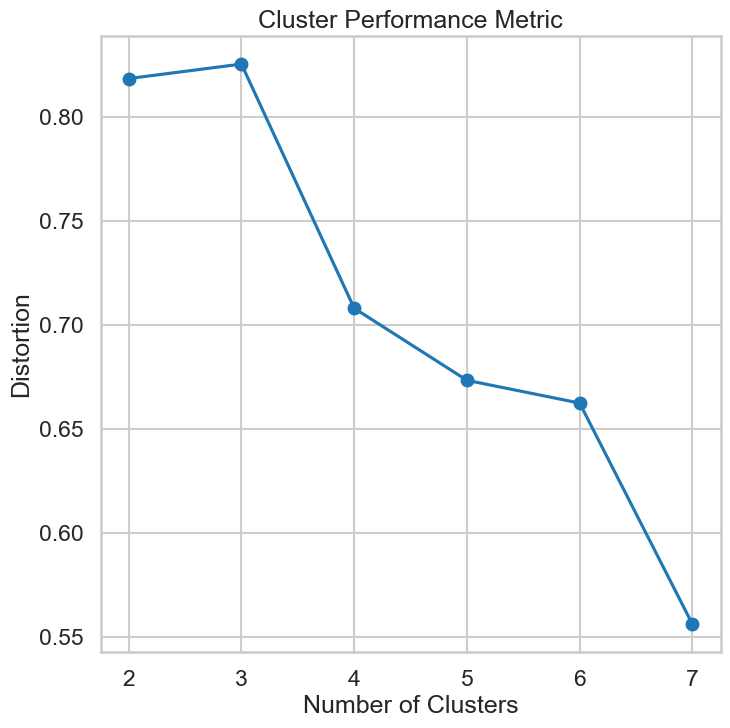

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


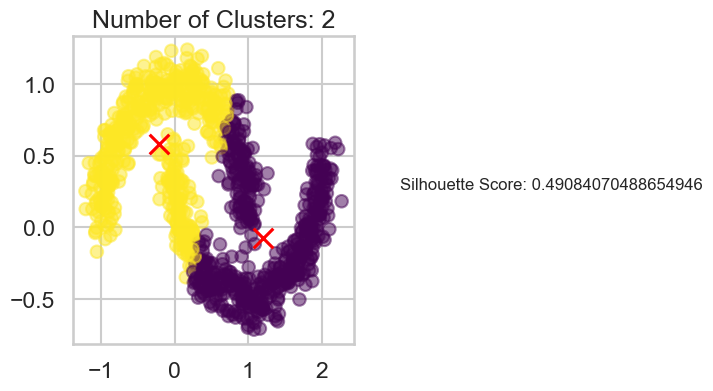

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


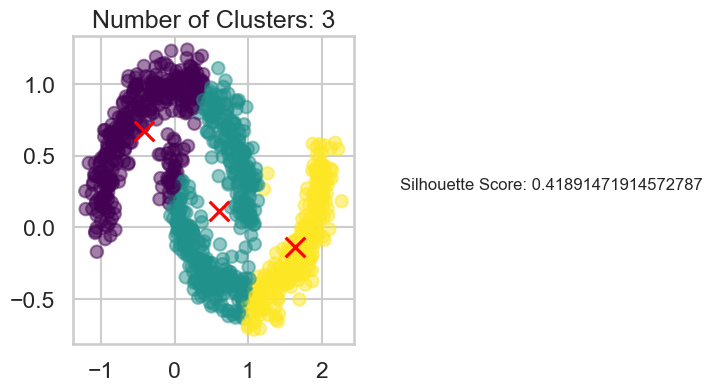

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


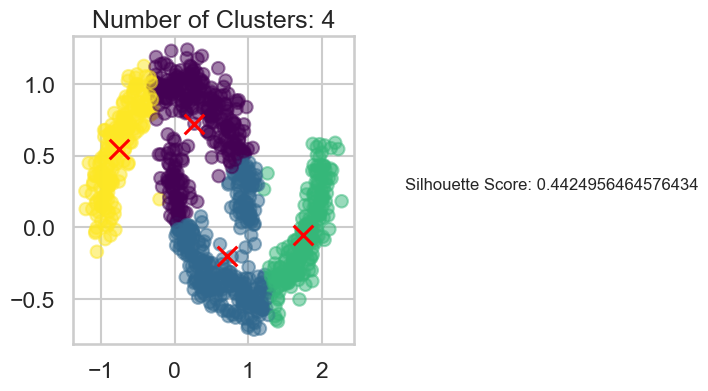

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


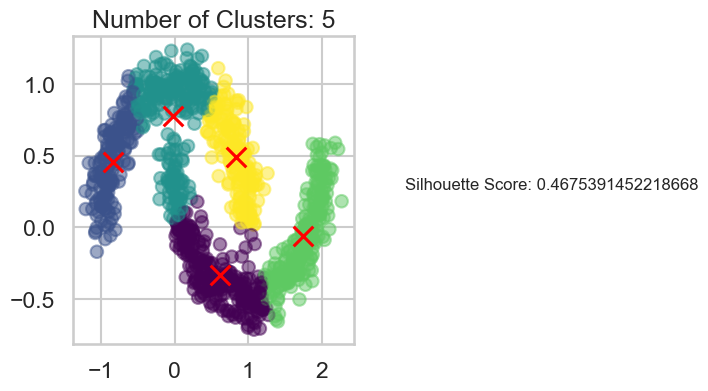

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


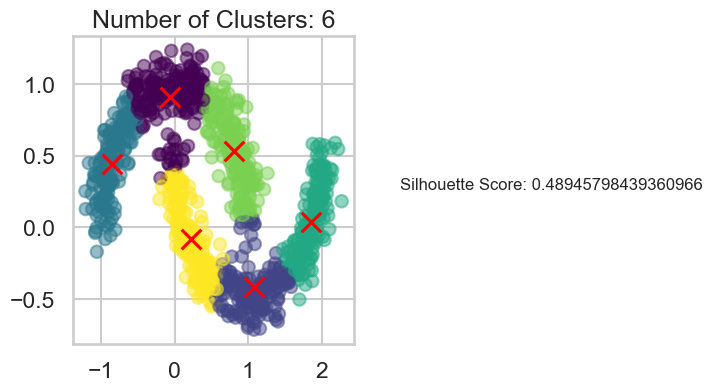

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


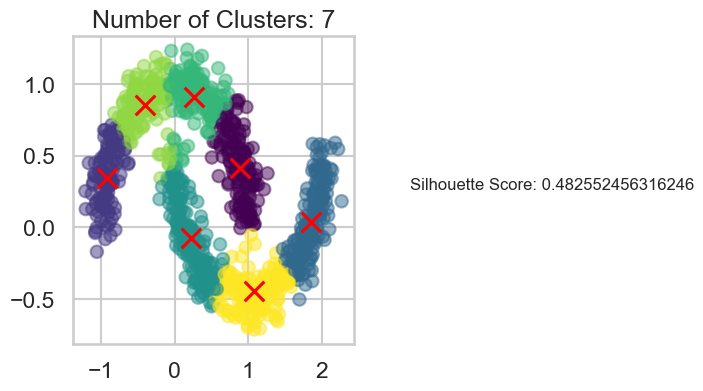

In [18]:
n_samples = 1000
X_example3, y = make_moons(n_samples=n_samples, noise=.1)
GUC_Kmean_plot(X_example3)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [23]:
customer_data=pd.read_csv('Customer data.csv')
# Remove missing values
customer_data_numeric = customer_data.select_dtypes(include=['number']).dropna()

# Normalization
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_numeric)

def GUC_Kmean_customer_data(X):
    num_clusters_range = range(2, 8)
    distortion_values = []

    for num_clusters in num_clusters_range:
        _, distortion = GUC_Kmean(X, num_clusters, Distance_Type="euclidean")
        distortion_values.append(distortion)

    # Plot cluster performance metric vs number of clusters
    plt.plot(num_clusters_range, distortion_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Performance Metric')
    plt.show()

    # Plot clusters for each number of centroids
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(X)
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
        plt.title(f'Number of Clusters: {num_clusters}')
        plt.subplot(1, 2, 2)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        plt.text(0.5, 0.5, f'Silhouette Score: {silhouette_avg}', ha='center', fontsize=12)
        plt.axis('off')
        plt.show()

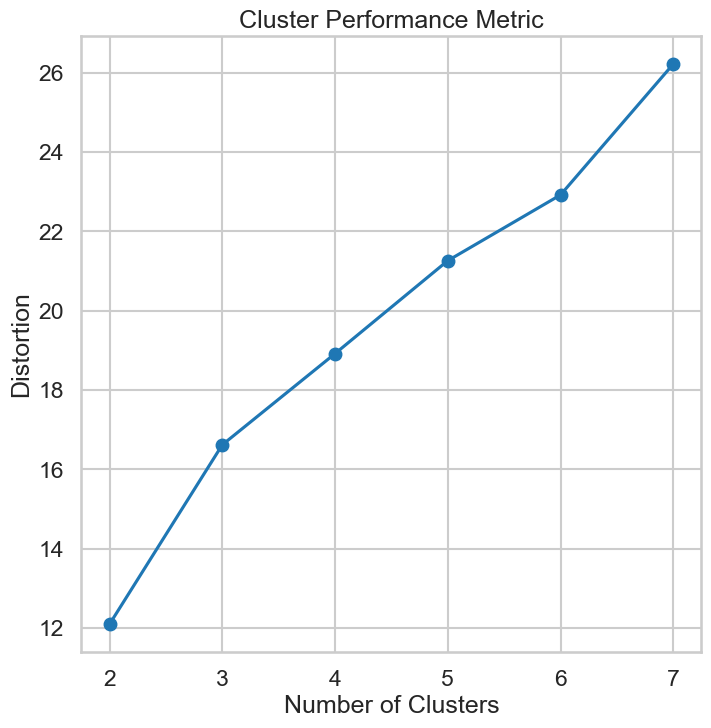

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


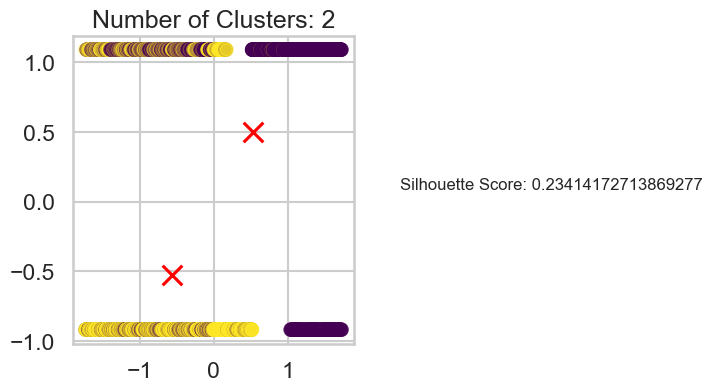

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


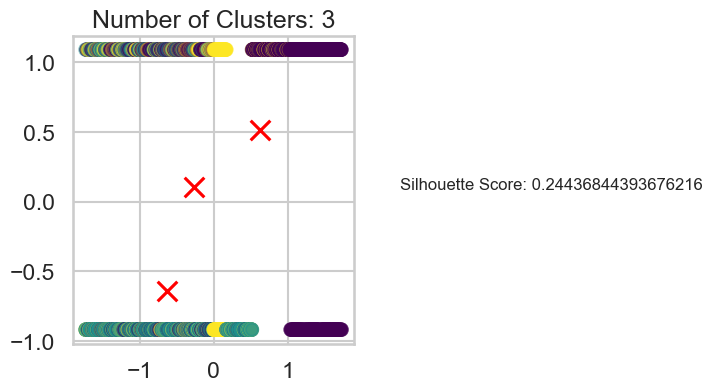

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


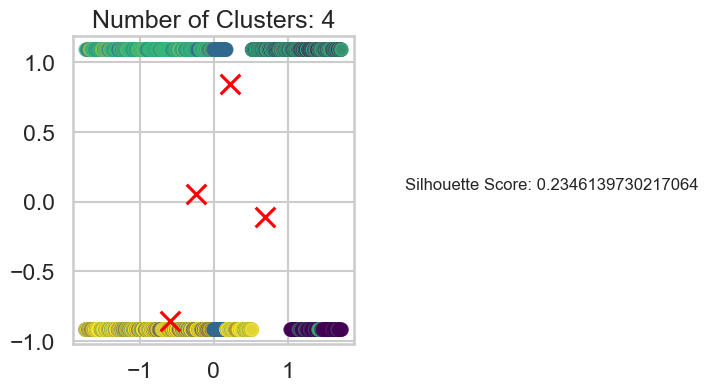

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


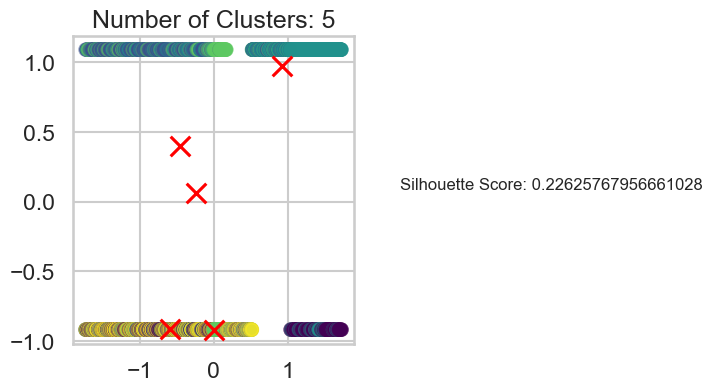

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


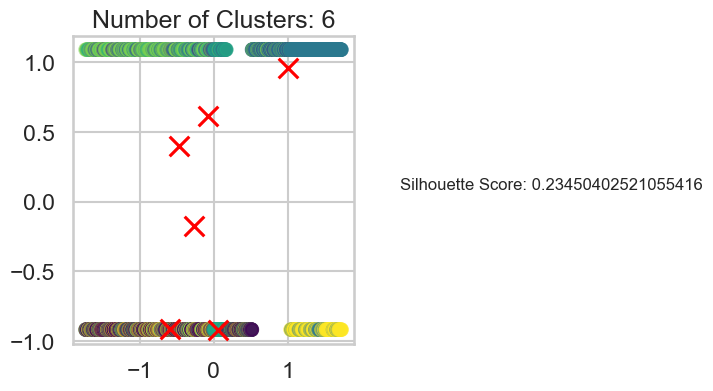

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


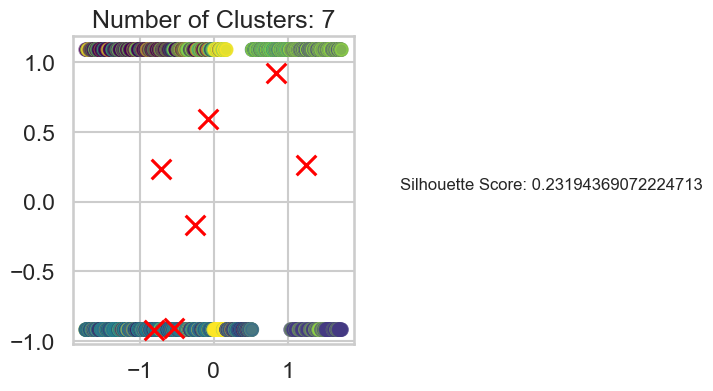

In [24]:
GUC_Kmean_customer_data(customer_data_scaled)